In [1]:
import pickle
import numpy as np
import os
import torch
import torch.nn as nn
import re
import sys
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import matplotlib.pyplot as plt

root = os.path.dirname(os.path.abspath(os.curdir))
sys.path.append(root)

from sr_model.models.models import AnalyticSR, STDP_SR
from datasets import inputs

device = 'cpu'

/home/chingf/Code/sr-project/datasets/inputs.py:12: UserWarning: Emily's experimental data could not be loaded.
  warnings.warn("Emily's experimental data could not be loaded.")


## Plot loss over training iterations

In [3]:
experiment_dir = "../trained_models/01_loss_curves/"
iterations = []
losses = []
exps = []

for exp in os.listdir(experiment_dir):
    for file in os.listdir(experiment_dir + exp):
        if 'tfevents' not in file: continue
        tfevents_file = experiment_dir + exp + '/' + file
        event_acc = EventAccumulator(tfevents_file)
        event_acc.Reload()
        scalar_events = event_acc.Scalars('loss_train')
        for i in range(len(scalar_events)):
            iterations.append(scalar_events[i].step)
            losses.append(scalar_events[i].value)
            exps.append(exp)
        break

iterations = np.array(iterations)
losses = np.array(losses)
exps = np.array(exps)

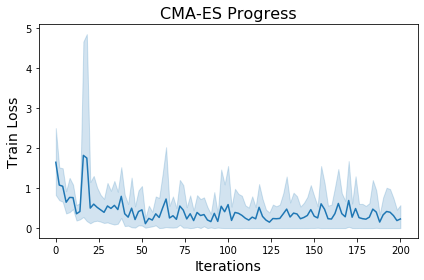

In [5]:
import seaborn as sns
import pandas as pd
df = pd.DataFrame({'Iterations': iterations, 'Loss': losses, 'Run': exps})
sns.lineplot(x='Iterations', y='Loss',data=df)
#plt.xlim(0, 100)
plt.xlabel('Iterations', fontsize=14)
plt.ylabel('Train Loss', fontsize=14)
plt.title('CMA-ES Progress', fontsize=16)
plt.tight_layout()
plt.savefig('loss_curves.png', dpi=100)
plt.show()